Получить надпись со знака

In [6]:
from matplotlib import pyplot as plt

In [7]:
import cv2
import numpy as np
import random

image = cv2.imread("./data/stop_segmented.jpg")[:,:,::-1]

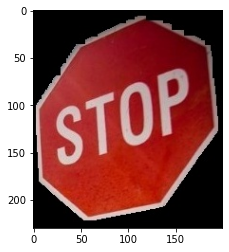

In [8]:
plt.imshow(image);

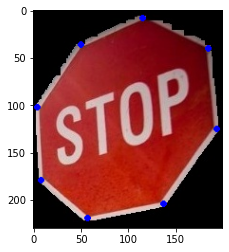

In [9]:
pts_src = np.array( [ [184,40], [193,125], \
                     [137,204], [57,219],  [8,179],  [4,102], [50,36], [115,8] ] )
image2 = image.copy()
cv2.circle(image2, pts_src[0], 2, (0,0,255), 2)
cv2.circle(image2, pts_src[1], 2, (0,0,255), 2)
cv2.circle(image2, pts_src[2], 2, (0,0,255), 2)
cv2.circle(image2, pts_src[3], 2, (0,0,255), 2)
cv2.circle(image2, pts_src[4], 2, (0,0,255), 2)
cv2.circle(image2, pts_src[5], 2, (0,0,255), 2)
cv2.circle(image2, pts_src[6], 2, (0,0,255), 2)
cv2.circle(image2, pts_src[7], 2, (0,0,255), 2)
plt.imshow(image2) 

In [10]:
image_black = np.zeros((300, 300, 3), dtype=np.uint8)

In [11]:
import numpy as np

# Размеры изображения
image_width = 300
image_height = 300

# Центр изображения
center_x = image_width // 2
center_y = image_height // 2

# Радиус восьмиугольника
radius = min(image_width, image_height) // 3

# Количество вершин восьмиугольника
num_vertices = 8

# Создание пустого массива для хранения координат вершин
vertices = np.zeros((num_vertices, 2), dtype=int)

# Вычисление угла между вершинами
angle = 2 * np.pi / num_vertices

# Вычисление координат вершин восьмиугольника
for i in range(num_vertices):
    theta = i * angle
    x = center_x + int(radius * np.cos(theta))
    y = center_y + int(radius * np.sin(theta))
    vertices[i] = (x, y)

print(vertices)


[[250 150]
 [220 220]
 [150 250]
 [ 80 220]
 [ 50 150]
 [ 80  80]
 [150  50]
 [220  80]]


In [12]:
pts_dst = np.array(vertices)

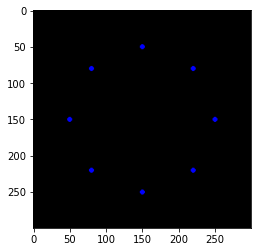

In [13]:
image2 = image_black.copy()
cv2.circle(image2, pts_dst[0], 2, (0,0,255), 2)
cv2.circle(image2, pts_dst[1], 2, (0,0,255), 2)
cv2.circle(image2, pts_dst[2], 2, (0,0,255), 2)
cv2.circle(image2, pts_dst[3], 2, (0,0,255), 2)
cv2.circle(image2, pts_dst[4], 2, (0,0,255), 2)
cv2.circle(image2, pts_dst[5], 2, (0,0,255), 2)
cv2.circle(image2, pts_dst[6], 2, (0,0,255), 2)
cv2.circle(image2, pts_dst[7], 2, (0,0,255), 2)
plt.imshow(image2) 

In [14]:
len(pts_src), len(pts_dst)

(8, 8)

In [15]:
h, status = cv2.findHomography(pts_src, pts_dst)

In [16]:
status

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [17]:
image_new = cv2.warpPerspective(image, h, (300,300), image_black, borderMode=cv2.BORDER_TRANSPARENT)

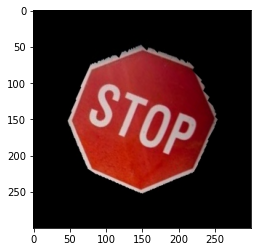

In [18]:
plt.imshow(image_new)

In [19]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [20]:
image = rotate_image(image_new, 22.5)[50:250,50:250]

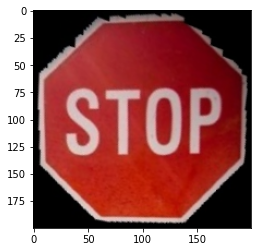

In [21]:
plt.imshow( image )

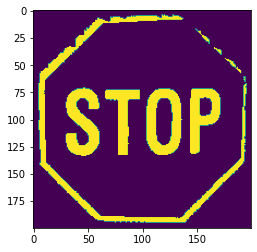

In [22]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_white = 100
upper_white = 255

mask = cv2.inRange(gray, lower_white, upper_white)

plt.imshow(mask)

In [23]:
k, labels = cv2.connectedComponents(mask)

<Figure size 432x288 with 0 Axes>

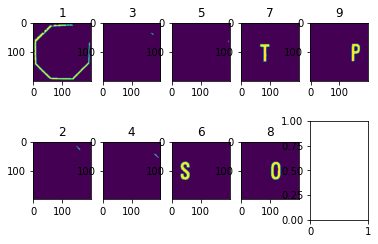

In [26]:
plt.figure();

f, axarr = plt.subplots(2,5)
for i in range(1,k):
    labels2 = labels.copy()
    labels2[labels2!=i]=0
    axarr[(i-1)%2][(i-1)//2].imshow(labels2);
    axarr[(i-1)%2][(i-1)//2].set_title(i);
    

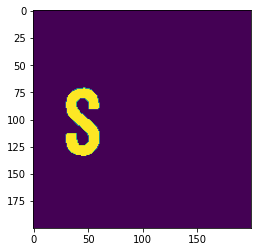

In [47]:
S = labels.copy()
S[S==6]=255
S[S!=255]=0
plt.imshow(S)

In [48]:
indcs = np.where(S==255)
x0, x1 = np.min(indcs[0]), np.max(indcs[0])
y0, y1 = np.min(indcs[1]), np.max(indcs[1])

In [49]:
x0,x1

(71, 133)

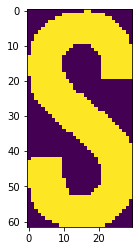

In [50]:
plt.imshow(S[x0:x1,y0:y1])

In [51]:
def find_component_bb(k, labels):
    S = labels.copy()
    S[S==k]=255
    S[S!=255]=0
    indcs = np.where(S==255)
    x0, x1 = np.min(indcs[0]), np.max(indcs[0])
    y0, y1 = np.min(indcs[1]), np.max(indcs[1])
    plt.imshow(image[x0:x1,y0:y1])
    return x0, x1, y0, y1
    

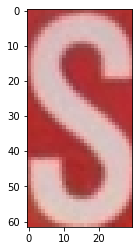

In [53]:
S_bb = find_component_bb(6, labels)

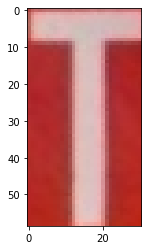

In [54]:
S_bb = find_component_bb(7, labels)

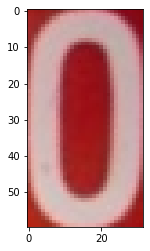

In [55]:
S_bb = find_component_bb(8, labels)

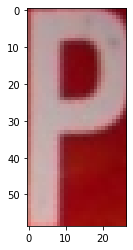

In [56]:
S_bb = find_component_bb(9, labels)

In [18]:
plt.imsave("./data/S.png", image[70:134,28:62] )
plt.imsave("./data/T.png", image[70:134,65:101] )
plt.imsave("./data/O.png", image[70:134,102:138] )
plt.imsave("./data/P.png", image[70:134,140:176] )

In [19]:
S = cv2.imread("./data/S.png")[:,:,::-1]
T = cv2.imread("./data/T.png")[:,:,::-1]
O = cv2.imread("./data/O.png")[:,:,::-1]
P = cv2.imread("./data/P.png")[:,:,::-1]

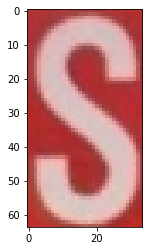

In [20]:
plt.imshow( S )

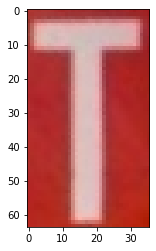

In [21]:
plt.imshow( T )

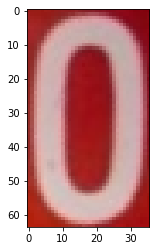

In [22]:
plt.imshow( O )

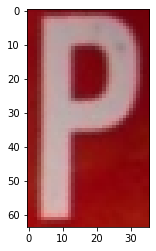

In [23]:
plt.imshow( P )

Теперь ищем по шаблонам

In [24]:
def show_template(tmplt):
    h, w, _ = tmplt.shape
    res = cv2.matchTemplate(image, tmplt, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    image_copy = image.copy()
    cv2.rectangle(image_copy,top_left, bottom_right, (0,0,255), 2);
    plt.imshow(image_copy)

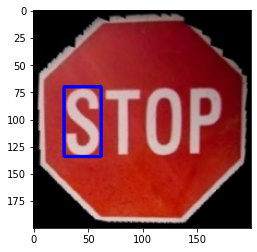

In [25]:
show_template(S)

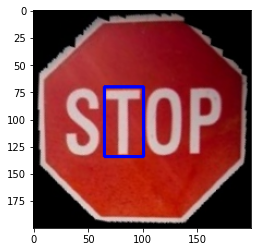

In [26]:
show_template(T)

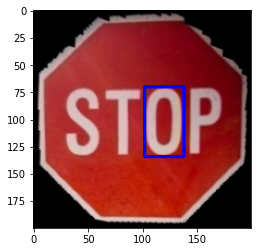

In [27]:
show_template(O)

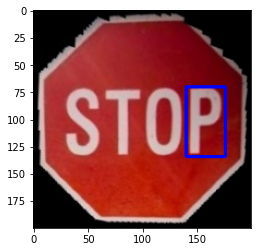

In [28]:
show_template(P)